In [16]:
import geopandas
import fiona
import matplotlib.pyplot as plt
import geopy

In [2]:
countries_gdf = geopandas.read_file("Uso_do_Solo_2018.shp",  encoding='utf-8')
countries_gdf.head()

,OBJECTID,UsoAgregad,Grupo,BaseGeoDBO,RuleID,Ano,RuleID_1,ShapeSTAre,ShapeSTLen,geometry
0,1,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,8188.561687,1,2018,Afloramentos rochosos e depósitos sedimentares,8188.565918,337.744461,"POLYGON ((683594.243 7446263.712, 683562.743 7..."
1,2,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,1357.095898,1,2018,Afloramentos rochosos e depósitos sedimentares,1357.094727,159.078568,"POLYGON ((646588.055 7446739.821, 646593.115 7..."
2,3,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,90180.373013,1,2018,Afloramentos rochosos e depósitos sedimentares,90180.374023,1716.454932,"POLYGON ((647581.746 7446823.861, 647574.106 7..."
3,4,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,36392.080374,1,2018,Afloramentos rochosos e depósitos sedimentares,36392.085449,733.208879,"POLYGON ((684643.345 7447154.513, 684594.184 7..."
4,5,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,1909.486647,1,2018,Afloramentos rochosos e depósitos sedimentares,1909.486816,176.367232,"POLYGON ((648272.032 7447589.797, 648239.156 7..."


In [3]:
countries_gdf.crs

{'init': 'epsg:31983'}

In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [5]:
capitals = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [6]:
countries = world[world['continent'] == "South America"]

In [7]:
countries = countries[['geometry', 'name']]


In [8]:
countries = countries.to_crs('+init=epsg:3395')
capitals = capitals.to_crs('+init=epsg:3395')

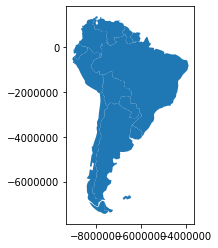

In [9]:
countries.plot()

In [10]:
# Now buffer cities to find area within 500km.
# Check CRS -- World Mercator, units of meters.
capitals.crs

'+init=epsg:3395'

In [11]:
capitals['geometry']= capitals.buffer(500000)

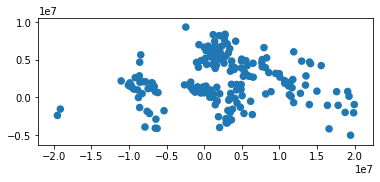

In [12]:
capitals.plot()

## GEO CODING

In [13]:
boros = geopandas.read_file(geopandas.datasets.get_path("nybb"))

In [14]:
boros.BoroName

0    Staten Island
1           Queens
2         Brooklyn
3        Manhattan
4            Bronx
Name: BoroName, dtype: object

In [15]:
boro_locations = geopandas.tools.geocode(boros.BoroName)

In [17]:
boro_locations

,geometry,address
0,POINT (-74.15020 40.57954),"Staten Island, NY, USA"
1,POINT (-73.79485 40.72823),"Queens, NY, USA"
2,POINT (-73.94415 40.67818),"Brooklyn, NY, USA"
3,POINT (-73.97124 40.78307),"Manhattan, New York, NY, USA"
4,POINT (-73.86482 40.84479),"Bronx, NY, USA"


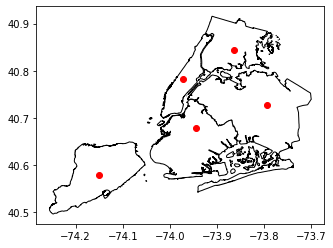

In [18]:
fig, ax = plt.subplots()
boros.to_crs({"init": "epsg:4326"}).plot(ax=ax, color="white", edgecolor="black")
boro_locations.plot(ax=ax, color="red")